**The Sparks Foundation**

**M.Mahalakshmi**

**Task 2 : Prediction using Unsupervised Learning in ML**



In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

#To ignore the Warnings
import warnings as wg
wg.filterwarnings("ignore")


In [22]:
#Load the Data
Iris_data = pd.read_csv("/content/Iris.csv")
Iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


**Visualizing the Data**

In [23]:
#First five rows
Iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#To check the nummber of roows and columns 
Iris_data.shape

(150, 6)

In [5]:
#to check the column names of Dataset
Iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
Iris_data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
#To check If missing values are there or not and to check the Datatype of dataset
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [24]:
#Descriptive Statistics of Iris_dataset
Iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [25]:
#Now lets drop the species column as it is Unsupervised Learning
Iris = pd.DataFrame(Iris_data)
Iris_data = Iris.drop(columns= ["Species","Id"] )
Iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Finding the optimum number of clusters**

Before clustering the data using KMeans,we need to specify the number of clusters.Here we use the Elbow Method to find the optimumm number of clusters.

**Elbow method** : The number of clusters are  varies within a range.For each number,within - cluster sum of square value is calculated and stored in list.These values are then plotted against the range used before.The location of bend in the 2nd plot indicates the number of clusters.

In [27]:
#Calculating the within-cluster sum of square
within_cluster_sum_square =[]

clusters_range = range(1,15)
for i in clusters_range:
  km = KMeans(n_clusters=i)
  km=km.fit(Iris_data)
  within_cluster_sum_square.append(km.inertia_)

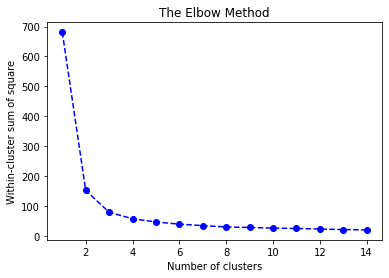

In [28]:
#Plotting the within_cluster_sum_sqaure against the range of clusers
plt.plot(clusters_range,within_cluster_sum_square,"go--",color="b")
plt.ylabel("Within-cluster sum of square")
plt.xlabel("Number of clusters")
plt.title("The Elbow Method")
plt.show()

**Observation**
we can clearly see why it is called "the elbow mothod from above graph,the optimum clusters is where the elbo occurs.This is when the Within_cluster_sum_of_square doesnt decrease significantly with every iteration.

**Applying the Kmeans clustering on the data**

In [29]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3,init="k-means++",max_iter=300,n_init = 10,random_state=0)
prediction = model.fit_predict(Iris_data)

**Visualizing the clusters**

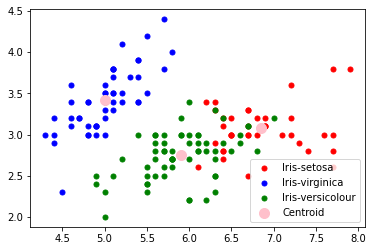

In [33]:
x= Iris_data.iloc[:, [0,1,2,3]].values
plt.scatter(x[prediction==0,0],x[prediction==0,1],s=25,c="red",label ="Iris-setosa")
plt.scatter(x[prediction==1,0],x[prediction==1,1],s=25,c="blue",label ="Iris-virginica")
plt.scatter(x[prediction==2,0],x[prediction==2,1],s=25,c="green",label ="Iris-versicolour")

#plotting against the range of clusters
plt.scatter(model.cluster_centers_[:, 0],model.cluster_centers_[:, 1],s =100,color ="pink",label ="Centroid")
plt.legend()
plt.show()